In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import phonopy
import yaml
import pickle
from phonopy.phonon.band_structure import get_band_qpoints_and_path_connections
plt.style.use(['science','grid','notebook'])
plt.rcParams['text.usetex'] = False

In [3]:
strains_band = ['graphene--4/first_order/band.pkl',
                'graphene--2/first_order/band.pkl',
                'graphene-0/first_order/band.pkl',
                'graphene-2/first_order/band.pkl',
                'graphene-4/first_order/band.pkl']

<>:23: SyntaxWarning: invalid escape sequence '\G'
<>:23: SyntaxWarning: invalid escape sequence '\G'
<>:23: SyntaxWarning: invalid escape sequence '\G'
<>:23: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipykernel_112158/1198277929.py:23: SyntaxWarning: invalid escape sequence '\G'
  plt.xticks([gG1,M,K,gG2],["$\Gamma$","M","K","$\Gamma$"],fontsize=10)
/tmp/ipykernel_112158/1198277929.py:23: SyntaxWarning: invalid escape sequence '\G'
  plt.xticks([gG1,M,K,gG2],["$\Gamma$","M","K","$\Gamma$"],fontsize=10)


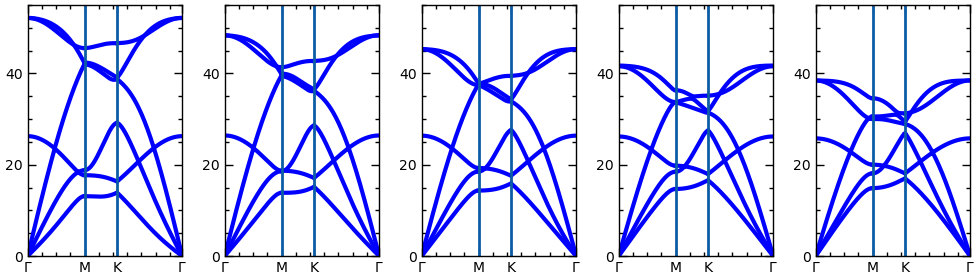

In [4]:
p=1
plt.figure(figsize=(10,3))

for e in strains_band:

    with open(e, 'rb') as f:
        d = pickle.load(f)

    gG1 = np.array(d['distances'])[0,:][0]
    M = np.array(d['distances'])[1,:][0]
    K = np.array(d['distances'])[2,:][0]
    gG2 = np.array(d['distances'])[2,:][-1]

    plt.subplot(1,5,p)

    for j in range(6):    
        for i in [0,1,2]:
            plt.plot(np.array(d['distances'])[i,:],np.array(d['frequencies'])[i,:,j], c='b',lw=3)

    plt.xlim(0,gG2)
    plt.ylim(0,55)
    plt.grid(False)
    plt.xticks([gG1,M,K,gG2],["$\Gamma$","M","K","$\Gamma$"],fontsize=10)
    plt.yticks(fontsize=10)
    plt.axvline(x=M)
    plt.axvline(x=K)
    p+=1

plt.tight_layout()
plt.savefig('strain-dispersion')

In [5]:
strains_gv = ['graphene--4/first_order/gv.pkl',
              'graphene--2/first_order/gv.pkl',
              'graphene-0/first_order/gv.pkl',
              'graphene-2/first_order/gv.pkl',
              'graphene-4/first_order/gv.pkl']

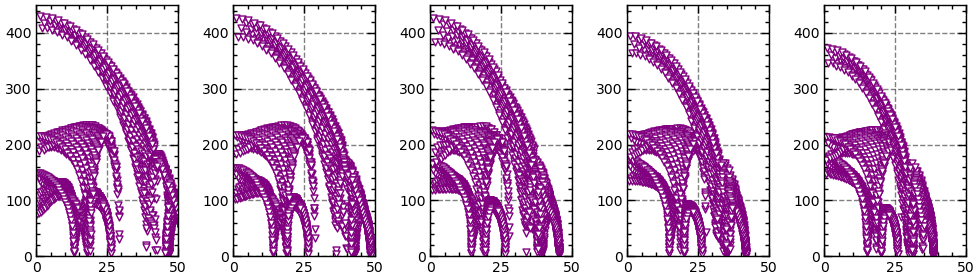

In [6]:
p=1
plt.figure(figsize=(10,3))

for e in strains_gv:

    with open(e, 'rb') as f:
        mesh_dict = pickle.load(f)

    qpoints = mesh_dict['qpoints']
    weights = mesh_dict['weights']
    frequencies = mesh_dict['frequencies']
    eigenvectors = mesh_dict['eigenvectors']
    group_velocities = mesh_dict['group_velocities']

    group_velocity_magnitude = np.linalg.norm(group_velocities, axis=2) 


    plt.subplot(1,5,p)

    for i in range(group_velocity_magnitude.shape[1]):
        plt.scatter(frequencies[:, i], group_velocity_magnitude[:, i], s=25, marker="v", c="w", edgecolor="purple")

        plt.xlim(0,50)
        plt.ylim(0,450)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    
    p+=1
    

plt.tight_layout()
plt.savefig('group_vel')